Step 1: Set the File Paths

In [2]:
import pandas as pd

# Define the file paths
train_file_path = 'house-prices-advanced-regression-techniques/train.csv'
test_file_path = 'house-prices-advanced-regression-techniques/test.csv'

# Load the data
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Display the first few rows of the training data
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Step 2: Explore and Clean the Data
2.1 Check for Missing Values

In [7]:
# Check for missing values in the training data
missing_values = train_data.isnull().sum()
missing_values[missing_values > 0]  # Show columns with missing values

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
# Fill missing values for numerical columns
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

# For categorical columns (if any), you can fill with mode
# train_data['ColumnName'].fillna(train_data['ColumnName'].mode()[0], inplace=True)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [11]:
# Fill missing values for numeric columns
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
train_data[numeric_cols] = train_data[numeric_cols].fillna(train_data[numeric_cols].mean())
test_data[numeric_cols] = test_data[numeric_cols].fillna(test_data[numeric_cols].mean())

# For categorical columns, fill missing values with the mode (most frequent value)
categorical_cols = train_data.select_dtypes(include=['object']).columns
train_data[categorical_cols] = train_data[categorical_cols].fillna(train_data[categorical_cols].mode().iloc[0])
test_data[categorical_cols] = test_data[categorical_cols].fillna(test_data[categorical_cols].mode().iloc[0])

KeyError: "['SalePrice'] not in index"

In [13]:
# Get numeric columns from training data, excluding the target 'SalePrice'
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.drop('SalePrice', errors='ignore')  # Exclude 'SalePrice' if present

# Fill missing values for numeric columns in both training and test datasets
train_data[numeric_cols] = train_data[numeric_cols].fillna(train_data[numeric_cols].mean())
test_data[numeric_cols] = test_data[numeric_cols].fillna(test_data[numeric_cols].mean())

# For categorical columns, fill missing values with the mode (most frequent value)
categorical_cols = train_data.select_dtypes(include=['object']).columns
train_data[categorical_cols] = train_data[categorical_cols].fillna(train_data[categorical_cols].mode().iloc[0])
test_data[categorical_cols] = test_data[categorical_cols].fillna(test_data[categorical_cols].mode().iloc[0])

Step 3: Exploring the Data
3.1 Descriptive Statistics

In [16]:
# Display descriptive statistics
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


3.2 Visualize the Target Variable (SalePrice)

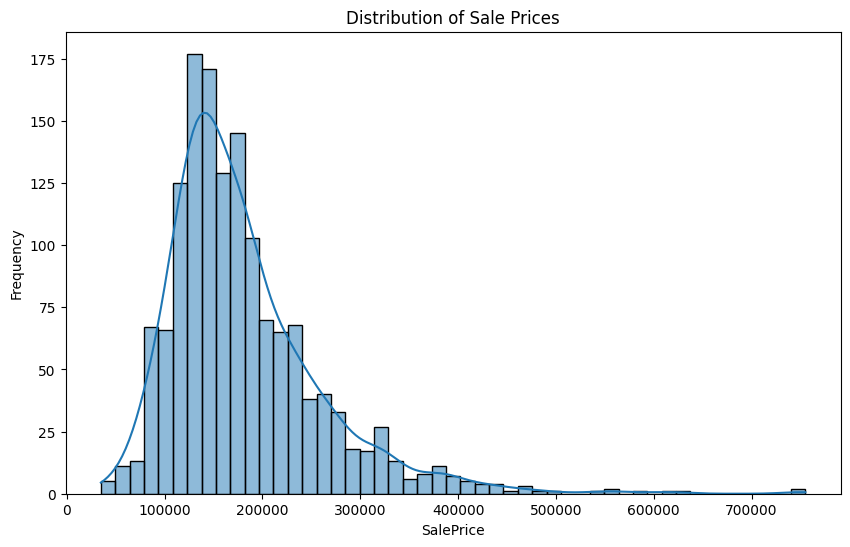

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

3.3 Feature Correlation with SalePrice

In [24]:
# Calculate the correlation matrix
corr_matrix = train_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Focus on the top 10 most correlated features with SalePrice
top_corr_features = corr_matrix.index[abs(corr_matrix['SalePrice']) > 0.5]
plt.figure(figsize=(10, 8))
sns.heatmap(train_data[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlated Features with SalePrice')
plt.show()

ValueError: could not convert string to float: 'Normal'

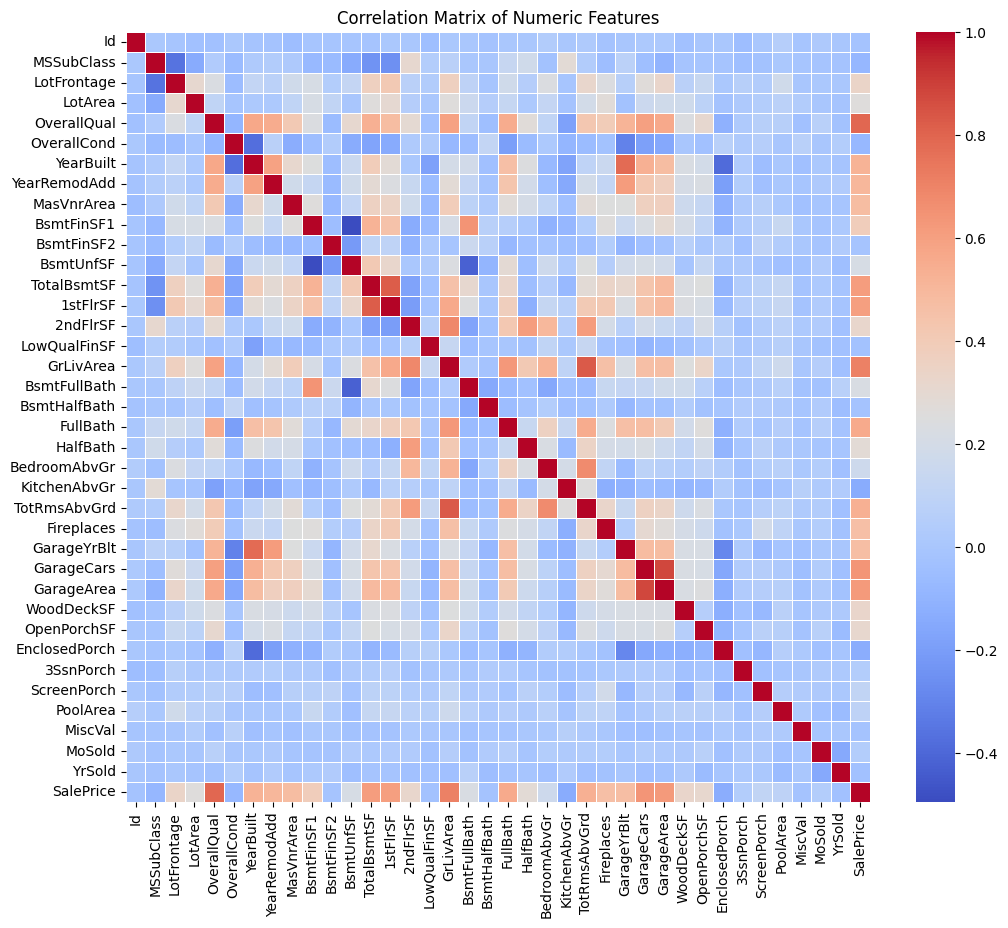

In [26]:
# Select only numeric columns from the training data
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Step 4: Model Training & Evaluation
4.1 Train-Test Split

In [31]:
from sklearn.model_selection import train_test_split

# Define features and target (exclude 'SalePrice' and 'Id')
X = numeric_data.drop(columns=['SalePrice'])  # All numeric features except 'SalePrice'
y = train_data['SalePrice']  # Target variable

# Split the data into training and validation sets (70% train, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the training and validation sets
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1022, 37), (438, 37), (1022,), (438,))

4.2 Build and Train the Linear Regression Model

In [34]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

4.3 Model Evaluation

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1244441590.8572614
R-squared: 0.8216645356897943


Step 6: Final Predictions on Test Data

In [42]:
# Make predictions on the test data (exclude 'Id')
test_data_cleaned = test_data.drop(columns=['Id'])
test_predictions = model.predict(test_data_cleaned)

# Create a submission file
submission = pd.DataFrame({
    'Id': pd.read_csv(test_file_path)['Id'],
    'SalePrice': test_predictions
})

# Save the submission file
submission.to_csv('submission.csv', index=False)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Alley
- BldgType
- BsmtCond
- BsmtExposure
- BsmtFinType1
- ...
Feature names seen at fit time, yet now missing:
- Id


Solution: Ensure Consistency Between Train and Test Features
	1.	Align the Training and Test Data:

In [45]:
# Align the training and test datasets by using the same columns
X_train, test_data_aligned = X_train.align(test_data_cleaned, join='inner', axis=1)

# Now, the test dataset has the same columns as X_train

In [47]:
# Make predictions on the aligned test data
test_predictions = model.predict(test_data_aligned)

# Create a submission file
submission = pd.DataFrame({
    'Id': pd.read_csv(test_file_path)['Id'],
    'SalePrice': test_predictions
})

# Save the submission file
submission.to_csv('submission.csv', index=False)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Id


In [49]:
# Exclude 'Id' from training features and from the aligned test data
X_train = X_train.drop(columns=['Id'], errors='ignore')
test_data_aligned = test_data_aligned.drop(columns=['Id'], errors='ignore')

In [51]:
# Re-train the model (after excluding 'Id')
model.fit(X_train, y_train)

LinearRegression()

In [53]:
# Make predictions on the aligned test data (without 'Id')
test_predictions = model.predict(test_data_aligned)

# Create the submission file
submission = pd.DataFrame({
    'Id': pd.read_csv(test_file_path)['Id'],  # Add 'Id' back to the submission
    'SalePrice': test_predictions
})

# Save the submission file
submission.to_csv('submission.csv', index=False)